In [1]:
# import libraries  and upload data 
import pandas as pd
import csv
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0


---
The dataset
Our dataset is provided by the Cleveland Clinic Foundation for Heart Disease. It's a CSV file with 303 rows. Each row contains information about a patient (a sample), and each column describes an attribute of the patient (a feature). We use the features to predict whether a patient has a heart disease (binary classification).

The description comes from the website:
https://keras.io/examples/structured_data/structured_data_classification_from_scratch/ 

---
Table description:

|Column|Description|Feature Type|
|-|-|-|
| Age| 	Age in years |	Numerical|
|Sex |	(1 = male; 0 = female)| 	Categorical|
|CP |	Chest pain type (0, 1, 2, 3, 4) |	Categorical|
|Trestbpd |	Resting blood pressure (in mm Hg on admission) |	Numerical|
|Chol |	Serum cholesterol in mg/dl |	Numerical|
|FBS 	|fasting blood sugar in 120 mg/dl (1 = true; 0 = false) |	Categorical|
|RestECG |	Resting electrocardiogram results (0, 1, 2) |	Categorical|
|Thalach |	Maximum heart rate achieved |	Numerical|
|Exang |	Exercise induced angina (1 = yes; 0 = no) |	Categorical|
|Oldpeak |	ST depression induced by exercise relative to rest |	Numerical|
|Slope |	Slope of the peak exercise ST segment |	Numerical|
|CA |	Number of major vessels (0-3) colored by fluoroscopy |	Both numerical & categorical|
|Thal |	3 = normal; 6 = fixed defect; 7 = reversible defect |	Categorical|
|Target |	Diagnosis of heart disease (1 = true; 0 = false) |	Target|

In [2]:
# Model import Logistic Regression 
from sklearn.linear_model import LogisticRegression

# Import of a prediction accuracy measure 
from sklearn.metrics import accuracy_score 

# Load the function that divides the file into training and test data 
from sklearn.model_selection import train_test_split

# X is the variable that contains the data that will be used for prediction 
X = df.iloc[:, :-1].values
# Y is the variable that will be tested and predicted 
y = df.iloc[:, -1].values

# Division into a training set and a test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Model building 
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Model training 
model.fit(X_train , y_train)

# Prediction based on the model
y_predicted = model.predict(X_test)

---

Legend:
- TN - True Negative -> Data classified correctly 
- FP - False Positive -> In real are negative
- FN - False Negative -> In real are positive 
- TP - True Positive -> Data classified correctly 
- N - Sample Size 

For the performed classification, we create a *confusion matrix*:
- theoretical - columns
- real - rows

|real \ theoretical|0|1|
|-|-|-|
|0|#TN|#FP|
|1|#FN|#TP|

In [3]:
# Import of the function responsible for generating the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_predicted, y_test)

array([[38,  7],
       [ 6, 10]], dtype=int64)

In [4]:
# Accuracy - (TN+TP)/N
# Percentage of correct classifications 
accuracy = accuracy_score(y_test, y_predicted)
accuracy = round(accuracy,3) * 100
print('Accuracy:', accuracy,'%')

Accuracy: 78.7 %


In [5]:
# Overall Error Rate - (FN+FP)/N
# Percentage of misclassifications 
oer = 1 - accuracy_score(y_predicted, y_test)
oer = round(oer,3) * 100
print('OER:', oer, '%')

OER: 21.3 %


In [6]:
# Sensitivity, Recall – (TP/(FN+TP)
# Percentage of correctly classified positive cases 
from sklearn.metrics import recall_score 
recall = recall_score(y_predicted, y_test)
recall = round(recall,3) * 100
print('Recall:', recall, '%')

Recall: 62.5 %


In [7]:
# Precision – TP/(FP+TP)
# Percentage of correct classifications among all those classified as positive 
from sklearn.metrics import precision_score 
precision = precision_score(y_predicted, y_test)
precision = round(precision,3) * 100
print('Precision:', precision, '%')

Precision: 58.8 %


---

The Area Under Curve (AUC) can be taken as a measure of the quality of the classification. AUC values and the quality of classification: 
- AUC ∈ (0.6; 0.7⟩ - weak,
- AUC ∈ (0.7; 0.8⟩ - acceptable,
- AUC ∈ (0.8; 0.9⟩ - good,
- AUC ∈ (0.9; 1⟩ - excellent. 

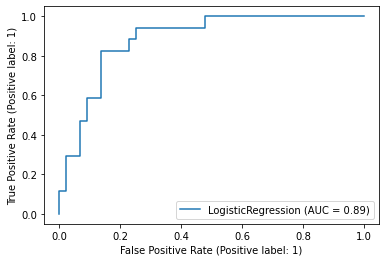

In [8]:
from sklearn.metrics import plot_roc_curve 
import matplotlib.pyplot as plt
plot_roc_curve(model, X_test, y_test)
plt.show()
# In our model, AUC = 0.89. It is an good result 

In [10]:
# Define one new data instance (One patient's data )
#Heading:
# age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca
# Example:
#Xnew = [[60,1,4,117,230,1,0,160,1,1.4,1,2]]

while True:
    decision = input("Do you want to enter patient data? [Y/N]: ")
    if decision not in ["Y", "y", "yes"]:
        break
    try:
        age = int(input("Age in years: "))
        sex = int(input("Sex (1 = male; 0 = female): "))
        cp = int(input("Chest pain type (0, 1, 2, 3, 4): "))
        trestbps = int(input("Resting blood pressure (in mm Hg on admission): "))
        chol = int(input("Serum cholesterol in mg/dl: "))
        fbs = int(input("fasting blood sugar in 120 mg/dl (1 = true; 0 = false): "))
        restecg = int(input("Resting electrocardiogram results (0, 1, 2): "))
        thalach = int(input("Maximum heart rate achieved: "))
        exang = int(input("Exercise induced angina (1 = yes; 0 = no): "))
        oldpeak = float(input("ST depression induced by exercise relative to rest: "))
        slope = int(input("Slope of the peak exercise ST segment: "))
        ca = int(input("Number of major vessels (0-3) colored by fluoroscopy: "))

        Xnew = [[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca]]

        # Make a prediction
        ynew = model.predict(Xnew)
        # Show the inputs and predicted outputs
        print()
        print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
        print()
        if ynew[0]:
            print("There is a high risk of Heart Disease ")
        else:
            print("There is a small risk of heart disease")
        
        add_decision = input("Do you want to add the results to the database?  [Y/N]: ")
        if add_decision not in ["Y", "y", "yes"]:
            break
        try:
            Xnew[0].append(ynew[0])
            with open(r'heart.csv', 'a') as f:
                writer = csv.writer(f)
                writer.writerow(Xnew[0])
        except:
            print("The entry could not be added to the database ")
    except:
        print("You only need to enter numeric values ")
        print("Incorrect result ")

Do you want to enter patient data? [Y/N]: y
Age in years: 60
Sex (1 = male; 0 = female): 1
Chest pain type (0, 1, 2, 3, 4): 4
Resting blood pressure (in mm Hg on admission): 112
Serum cholesterol in mg/dl: 225
fasting blood sugar in 120 mg/dl (1 = true; 0 = false): 1
Resting electrocardiogram results (0, 1, 2): 0
Maximum heart rate achieved: 155
Exercise induced angina (1 = yes; 0 = no): 1
ST depression induced by exercise relative to rest: 1.4
Slope of the peak exercise ST segment: 1
Number of major vessels (0-3) colored by fluoroscopy: 2

X=[60, 1, 4, 112, 225, 1, 0, 155, 1, 1.4, 1, 2], Predicted=1

There is a high risk of Heart Disease 
Do you want to add the results to the database?  [Y/N]: y
Do you want to enter patient data? [Y/N]: n
